In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pwd
!ls

/content
drive  sample_data


In [4]:
import os
os.chdir("/content/drive/MyDrive/proyecto2/TIFF2")
!ls

In [5]:
from PIL import Image
import urllib.request

import ee # Google Earth Engine
from os import system

In [6]:
 import ee
 ee.Authenticate()
 ee.Initialize(project='ee-santiagobautista2346')

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [7]:
%pwd

'/content/drive/MyDrive/proyecto2/TIFF2'

In [8]:
import urllib.request
from PIL import Image
import ee

# Inicializamos la API de Earth Engine (si no está inicializada)
ee.Initialize()

def sentinel2(start_date, end_date, geometry, imageVisParam):
    IMGSentinel = ee.ImageCollection('COPERNICUS/S2_SR') \
                  .filterDate(start_date, end_date) \
                  .filterBounds(geometry) \
                  .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'Less_Than', 30)
    print("size: ", IMGSentinel.size().getInfo())

    collectionList = IMGSentinel.toList(IMGSentinel.size())
    collectionSize = collectionList.size().getInfo()

    imgs = []
    fechas = []
    for i in range(collectionSize):
        SentinelFiltro = ee.Image(collectionList.get(i))
        SentinelClip = SentinelFiltro.clip(geometry)

        # Extraemos las bandas sin visualización, simplemente como imagen multibanda
        imagen = SentinelClip.select([ "B2", "B3","B4", "B5", "B6", "B7", "B8"])

        # Obtener la URL de la imagen para descargarla
        url = imagen.getDownloadURL({
            'scale': 10,  # Resolución espacial más alta (10 metros por píxel)
            'region': geometry,  # Región de interés
            'format': 'GeoTIFF',  # Formato de archivo GeoTIFF
            'crs': 'EPSG:4326',  # Sistema de coordenadas geográficas
            'maxPixels': 1e8  # Aumentar el límite de píxeles para una descarga más grande si es necesario
        })
        print(ee.Date(ee.Image(collectionList.get(i)).get('system:time_start')).format('Y-M-d').getInfo())

        imgs.append(url)  # Guardar la URL para la descarga
        fechas.append(ee.Date(ee.Image(collectionList.get(i)).get('system:time_start')).format('Y-M-d').getInfo())
    return (imgs, fechas)

def download_image(list_imagenRGB, rutaImg, extension, view_url=False):
    for i, url in enumerate(list_imagenRGB):
        try:
            if view_url:
                print(url)  # Mostrar la URL de descarga

            # Descargar el archivo GeoTIFF
            response = urllib.request.urlopen(url)
            with open(rutaImg[i], 'wb') as f:
                f.write(response.read())

            print("Estatus de la descarga: ", True)
        except Exception as e:
            print("Error en la descarga:", e)
            print("Estatus de la descarga: ", False)

geometry_fusagasuga = ee.Geometry.MultiPolygon(
    [[[-74.42900417837707,4.311668406837196],
      [-74.32763813528625,4.311668406837196],
      [-74.32763813528625,4.36250583752319],
      [-74.42900417837707,4.36250583752319],
      [-74.42900417837707,4.311668406837196]]],
    None, False)

# Parámetros de visualización para tres bandas (pero no afecta la descarga de imágenes multibanda)
imageVisParam = {"bands": ["B4", "B3", "B2"], "min": 0, "max": 5000}

# Fechas y extensión para la descarga
start_date = '2020-01-01'
end_date = '2020-12-28'
ext = 'tif'  # Formato TIFF

# Llamada a la función para obtener las imágenes de Sentinel-2
img_sat, fechas = sentinel2(start_date, end_date, geometry_fusagasuga, imageVisParam)

# Crear nombres para las imágenes de salida, incluyendo fechas y bandas seleccionadas
output_img = ['fusagasuga_banda' + fecha.replace('-', '_') + "_" + str(i) + '.' + ext for i, fecha in enumerate(fechas)]

# Descargar y guardar las imágenes multibanda (con todas las bandas seleccionadas)
download_image(img_sat, output_img, ext, view_url=True)

/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2_SR! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

  warnings.warn(warning, category=DeprecationWarning)


size:  5
2020-1-4
2020-1-9
2020-1-14
2020-2-13
2020-3-4
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/ca4808052bca09f56af78441ea2a1ba5-c554399b969204b2e28d2989f4c5df5b:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/7e90595f514bfa91f8e2f99b2e1f8b8c-e17e7dc8be0b383cee8a32fea01015d2:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/53fb3fe7e1a73e9d11dfddf120e545bd-c9358728f7f8d64ebb97d394c4e9895e:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/7903f4cfbef0fff481205c5748019ff3-ad1c5bcc2162b4c12b9bc4cb99438c7c:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/96c537f1f533519453fa0d0e2140ce8b-7e641715d2ac60170563d7ed99cb2df3:getPixels
Estatus de la descarga:  True


In [9]:
!pip install rasterio numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 46.0 MB/s eta 0:00:00


In [42]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

In [43]:
imagen_satelital = rasterio.open(r"/content/drive/MyDrive/proyecto2/TIFF2/fusagasuga_banda2020_1_9_1.tif")

In [45]:
banda_azul = imagen_satelital.read(2)
banda_azul_norm = banda_azul / banda_azul.max()
banda_azul_norm

array([[0.02810023, 0.02824179, 0.03192242, ..., 0.02505663, 0.02682616,
        0.02633069],
       [0.03383352, 0.03135617, 0.03100227, ..., 0.02371178, 0.02583522,
        0.0247735 ],
       [0.03496602, 0.03347961, 0.03234711, ..., 0.02427803, 0.02767554,
        0.02640147],
       ...,
       [0.02923273, 0.0339043 , 0.03171008, ..., 0.0617214 , 0.0743205 ,
        0.07403737],
       [0.03227633, 0.0335504 , 0.03291336, ..., 0.06349094, 0.06950736,
        0.07191393],
       [0.03227633, 0.03376274, 0.03340883, ..., 0.06695923, 0.07403737,
        0.07184315]])

In [46]:
banda_verde = imagen_satelital.read(3)
banda_verde_norm = banda_verde / banda_verde.max()
banda_verde_norm

array([[0.01629776, 0.02099757, 0.02243784, ..., 0.0193299 , 0.01917829,
        0.01857186],
       [0.01986052, 0.02137659, 0.02304427, ..., 0.01826865, 0.01902668,
        0.01766222],
       [0.02167981, 0.02061856, 0.02198302, ..., 0.01887508, 0.01993633,
        0.01963311],
       ...,
       [0.01735901, 0.01834445, 0.01766222, ..., 0.06352335, 0.08035173,
        0.08217101],
       [0.0194057 , 0.01788963, 0.01978472, ..., 0.05404791, 0.06875379,
        0.06716192],
       [0.01879927, 0.01788963, 0.01796543, ..., 0.05473014, 0.06663129,
        0.06208308]])

In [47]:
banda_rojo = imagen_satelital.read(4)
banda_rojo_norm = banda_rojo / banda_rojo.max()
banda_rojo_norm

array([[0.05174288, 0.05471411, 0.05471411, ..., 0.04065512, 0.04065512,
        0.03898833],
       [0.05775781, 0.05884484, 0.05884484, ..., 0.04065512, 0.04065512,
        0.03898833],
       [0.05775781, 0.05884484, 0.05884484, ..., 0.03978549, 0.03978549,
        0.0381187 ],
       ...,
       [0.05362707, 0.05362707, 0.05790275, ..., 0.11609537, 0.11609537,
        0.1190666 ],
       [0.05935213, 0.05935213, 0.06072904, ..., 0.11609537, 0.11609537,
        0.1190666 ],
       [0.05935213, 0.05935213, 0.06072904, ..., 0.10942822, 0.10942822,
        0.116965  ]])

In [48]:
banda_infrarojo = imagen_satelital.read(5)
banda_infrarojo_norm = banda_infrarojo / banda_infrarojo.max()
banda_infrarojo_norm

array([[0.18454813, 0.17458611, 0.17458611, ..., 0.1095105 , 0.1095105 ,
        0.10965384],
       [0.19200172, 0.18590984, 0.18590984, ..., 0.1095105 , 0.1095105 ,
        0.10965384],
       [0.19200172, 0.18590984, 0.18590984, ..., 0.10033685, 0.10033685,
        0.10248692],
       ...,
       [0.16792088, 0.16792088, 0.16648749, ..., 0.22891135, 0.22891135,
        0.22353616],
       [0.17050097, 0.17050097, 0.17515946, ..., 0.22891135, 0.22891135,
        0.22353616],
       [0.17050097, 0.17050097, 0.17515946, ..., 0.25062711, 0.25062711,
        0.23700996]])

In [49]:
banda_swir1 = imagen_satelital.read(6)
banda_swir1_norm = banda_swir1 / banda_swir1.max()
banda_swir1_norm

array([[0.22135922, 0.22215031, 0.22215031, ..., 0.12729234, 0.12729234,
        0.12340885],
       [0.22826321, 0.23624595, 0.23624595, ..., 0.12729234, 0.12729234,
        0.12340885],
       [0.22826321, 0.23624595, 0.23624595, ..., 0.12369651, 0.12369651,
        0.12966559],
       ...,
       [0.20330816, 0.20330816, 0.199137  , ..., 0.25940309, 0.25940309,
        0.25559151],
       [0.20762316, 0.20762316, 0.20704782, ..., 0.25940309, 0.25940309,
        0.25559151],
       [0.20762316, 0.20762316, 0.20704782, ..., 0.29636821, 0.29636821,
        0.27932398]])

In [50]:
banda_swir2 = imagen_satelital.read(7)
banda_swir2_norm = banda_swir2 / banda_swir2.max()
banda_swir2_norm

array([[0.2254502 , 0.21518008, 0.21672763, ..., 0.11859876, 0.12443725,
        0.12591446],
       [0.24064434, 0.23600169, 0.20786438, ..., 0.11430782, 0.12507034,
        0.12408554],
       [0.24416151, 0.25295442, 0.23213281, ..., 0.11951322, 0.12802476,
        0.13935003],
       ...,
       [0.18964547, 0.20990433, 0.19449916, ..., 0.22777153, 0.22552054,
        0.23501688],
       [0.20019696, 0.19949353, 0.18605796, ..., 0.26540518, 0.26927406,
        0.27335397],
       [0.20476927, 0.22256612, 0.21377321, ..., 0.28425718, 0.29466798,
        0.28897017]])

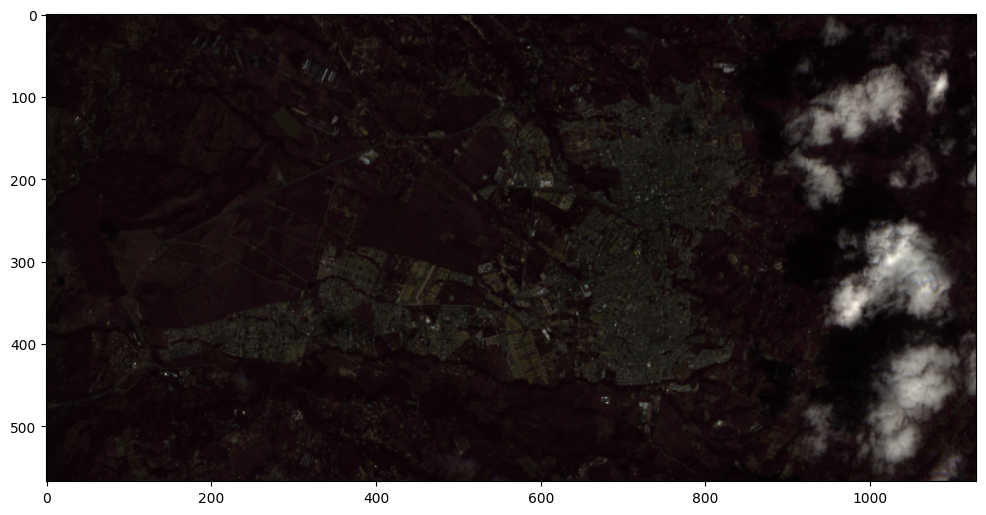

In [51]:
composicion = np.dstack((banda_rojo_norm, banda_verde_norm, banda_azul_norm))
plt.subplots(figsize = (12, 12))
plt.imshow(composicion)

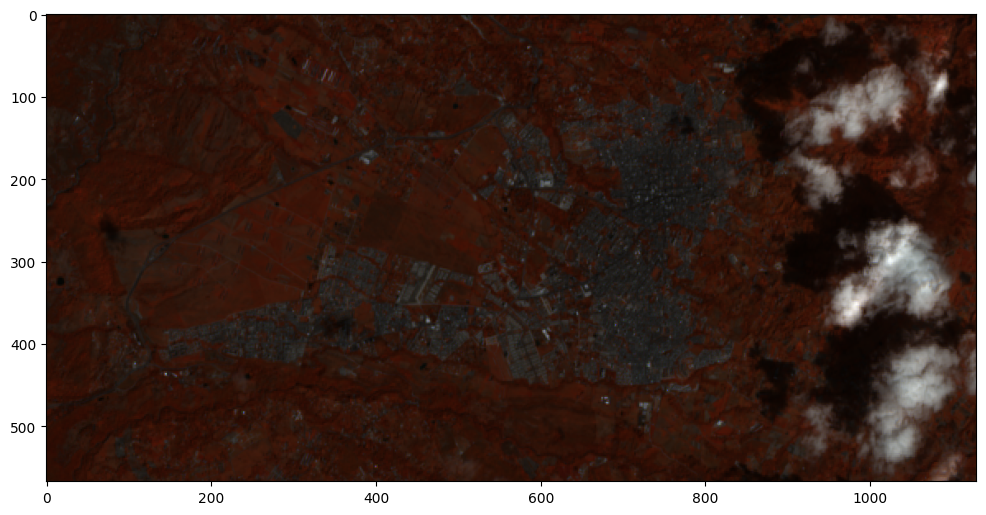

In [52]:
composicion = np.dstack((banda_infrarojo_norm, banda_rojo_norm, banda_verde_norm))
plt.subplots(figsize = (12, 12))
plt.imshow(composicion)

In [53]:
NDVI = ((banda_infrarojo_norm - banda_rojo_norm) / (banda_infrarojo_norm + banda_rojo_norm))

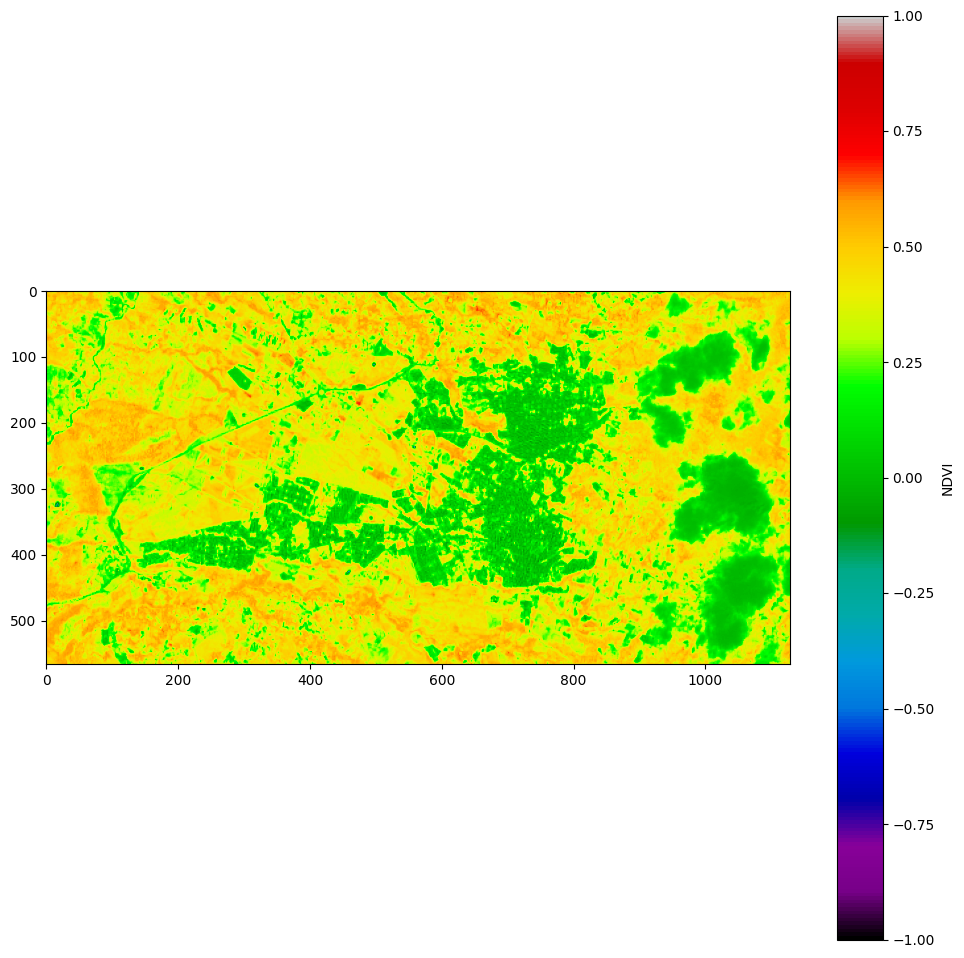

In [54]:
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI, cmap='nipy_spectral', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')

# Filtro de Suavizado (Media o Gaussiano)

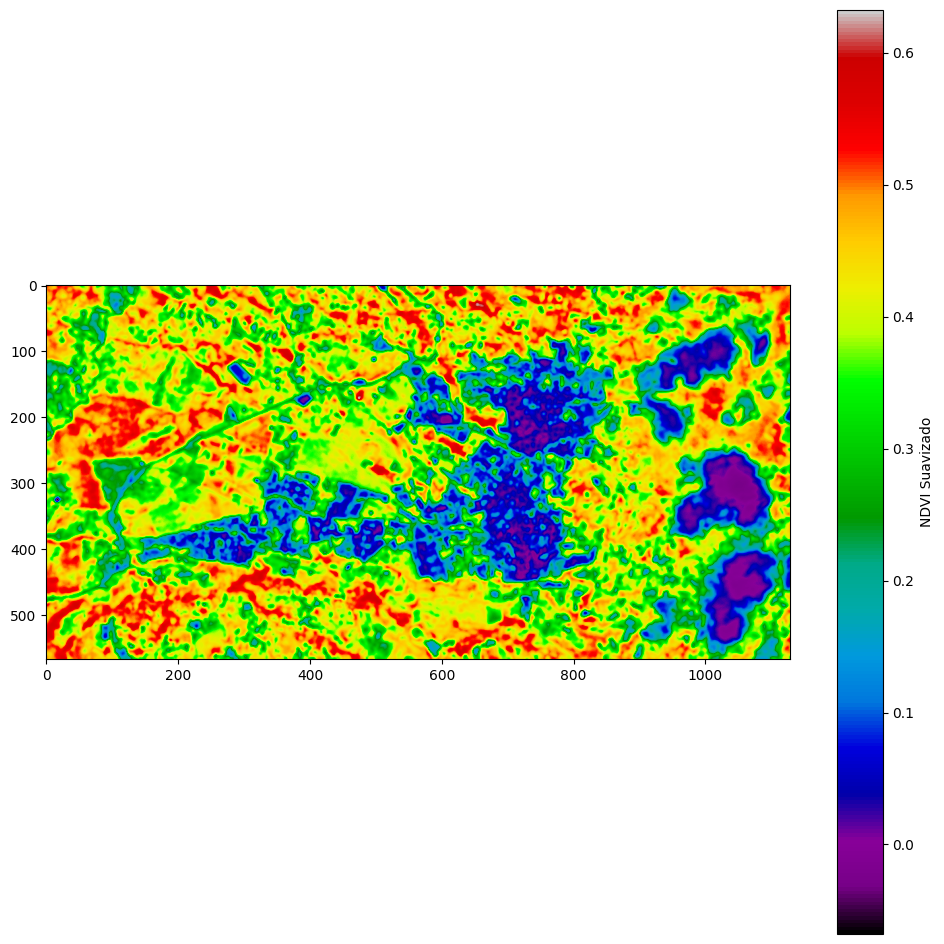

In [55]:
from scipy.ndimage import gaussian_filter

# Suavizar la banda del NDVI
NDVI_suavizado = gaussian_filter(NDVI, sigma=2)  # sigma controla el grado de suavizado
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_suavizado, cmap='nipy_spectral')
plt.colorbar(label='NDVI Suavizado')

# Filtro Laplaciano (Realce de Bordes)

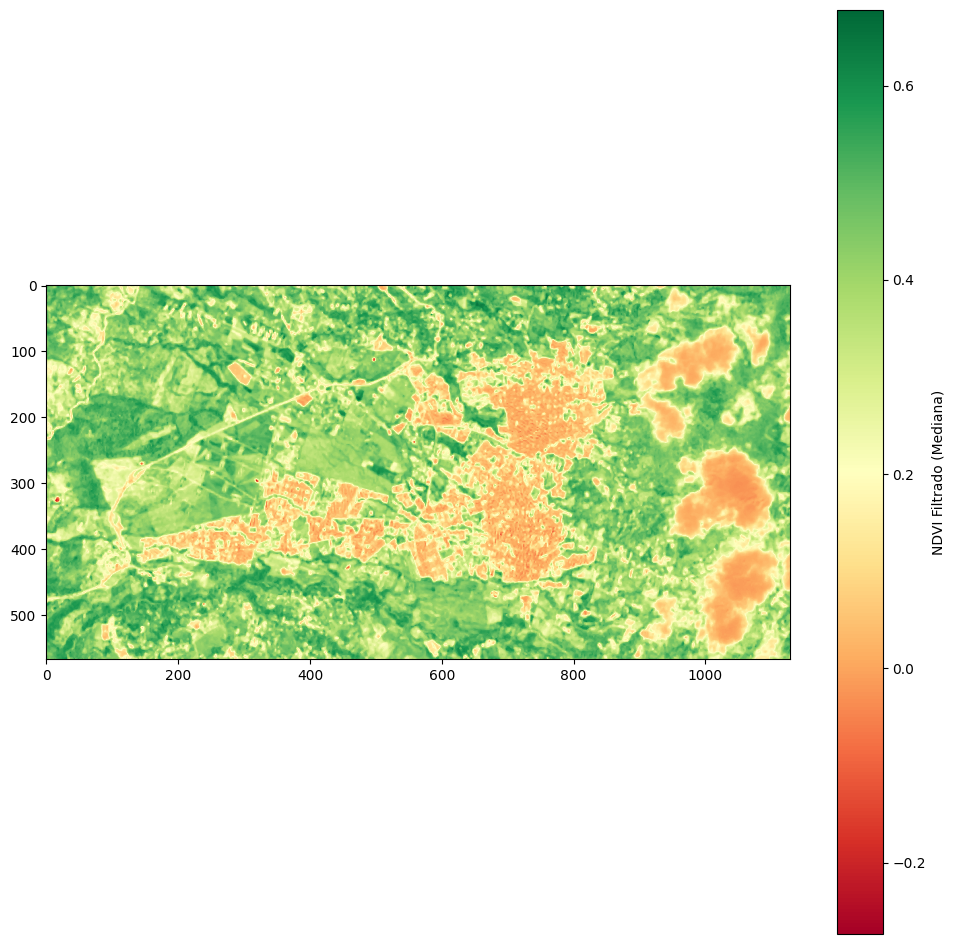

In [56]:
from scipy.ndimage import median_filter

NDVI_mediana = median_filter(NDVI, size=3)
plt.subplots(figsize = (12, 12)) # tamaño del filtro
plt.imshow(NDVI_mediana, cmap='RdYlGn')
plt.colorbar(label='NDVI Filtrado (Mediana)')

In [57]:
def load_image(file_path):
    # Cargar imagen y extraer bandas
    imagen_satelital = rasterio.open(file_path)
    bandas = {i: imagen_satelital.read(i) / imagen_satelital.read(i).max() for i in range(1, 8)}
    return bandas

def calculate_ndvi(bandas):
    # Cálculo del NDVI
    banda_infrarojo = bandas[5]  # Verifica que sea la banda correcta
    banda_rojo = bandas[4]
    NDVI = (banda_infrarojo - banda_rojo) / (banda_infrarojo + banda_rojo)
    return NDVI

def apply_filter(image, filter_type='gaussian', **kwargs):
    # Aplicar filtro basado en el tipo
    if filter_type == 'gaussian':
        return gaussian_filter(image, sigma=kwargs.get('sigma', 2))
    elif filter_type == 'median':
        return median_filter(image, size=kwargs.get('size', 3))
    elif filter_type == 'laplace':
        return laplace(image)
    else:
        raise ValueError("Filtro no reconocido")

def plot_image(image, cmap='RdYlGn', title=''):
    # Mostrar la imagen procesada
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.colorbar(label=title)
    plt.title(title)
    plt.show()

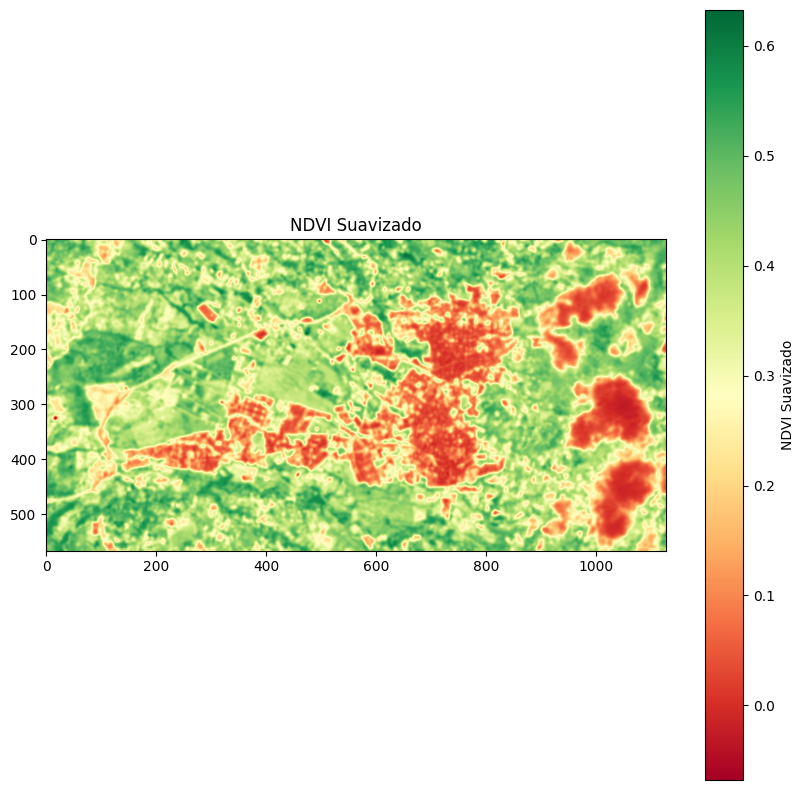

In [58]:
# 1. Cargar las bandas
file_path = "/content/drive/MyDrive/proyecto2/TIFF2/fusagasuga_banda2020_1_9_1.tif"
bandas = load_image(file_path)

# 2. Calcular el NDVI
NDVI = calculate_ndvi(bandas)

# 3. Aplicar un filtro (por ejemplo, suavizado gaussiano)
NDVI_suavizado = apply_filter(NDVI, filter_type='gaussian', sigma=2)

# 4. Visualizar el NDVI procesado
plot_image(NDVI_suavizado, cmap='RdYlGn', title='NDVI Suavizado')


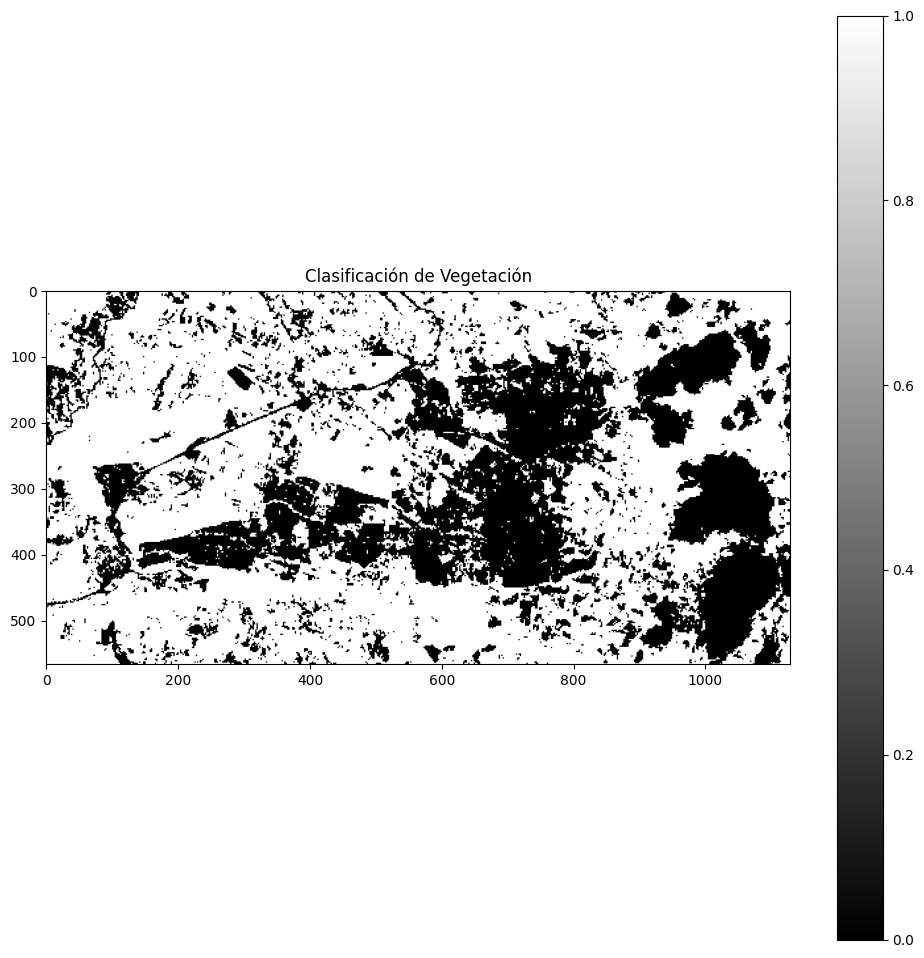

In [59]:
NDVI_clasificado = np.where(NDVI > 0.3, 1, 0)  # Umbral de 0.3
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_clasificado, cmap='gray')
plt.title("Clasificación de Vegetación")
plt.colorbar()

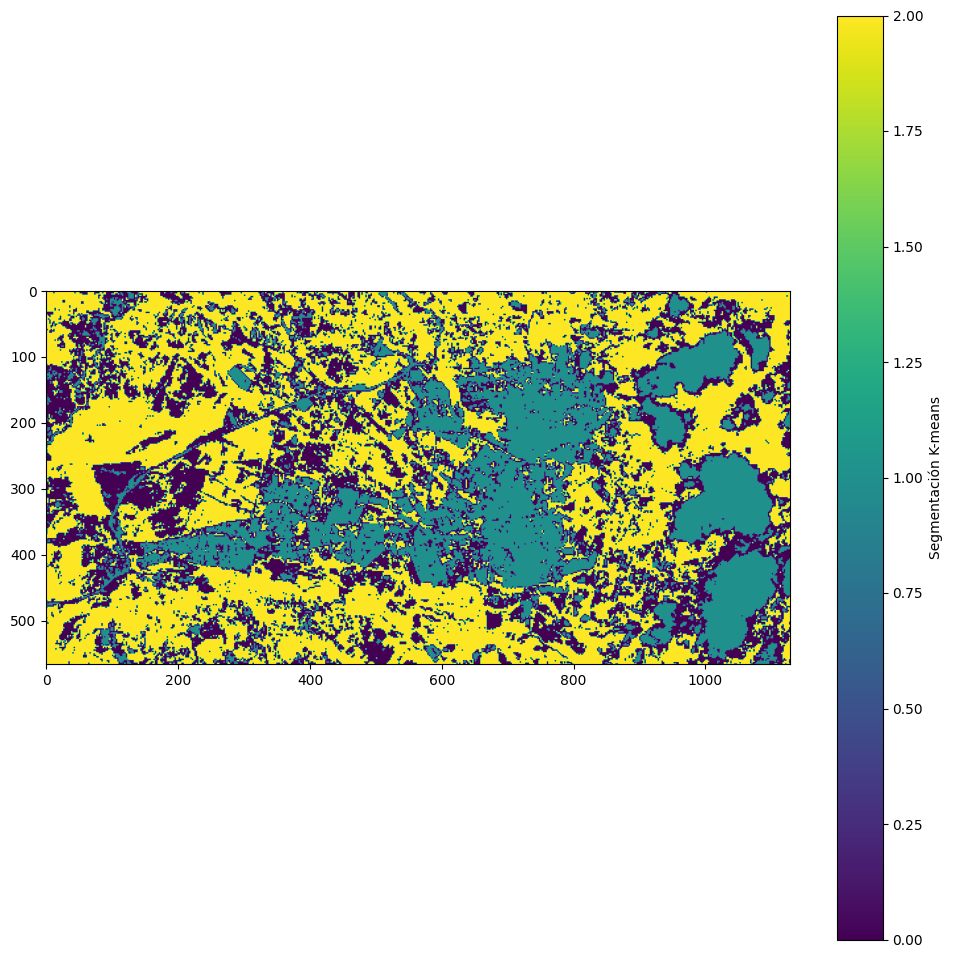

In [60]:
from sklearn.cluster import KMeans

NDVI_flat = NDVI.flatten().reshape(-1, 1)  # Aplanar
kmeans = KMeans(n_clusters=3, random_state=0).fit(NDVI_flat)
NDVI_segmentado = kmeans.labels_.reshape(NDVI.shape)
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_segmentado, cmap='viridis')
plt.colorbar(label='Segmentación K-means')


In [61]:
MNDWI = ((banda_verde_norm - banda_infrarojo_norm) / (banda_verde_norm + banda_infrarojo_norm))
MNDWI

array([[-0.83770883, -0.78528297, -0.77223235, ..., -0.69994043,
        -0.70194311, -0.71032544],
       [-0.81251476, -0.79374828, -0.77943225, ..., -0.71405901,
        -0.70395052, -0.7225453 ],
       [-0.79708301, -0.80033199, -0.78851587, ..., -0.68333577,
        -0.66848259, -0.67846207],
       ...,
       [-0.81261856, -0.80302882, -0.80817543, ..., -0.56555533,
        -0.48036649, -0.46242011],
       [-0.79562908, -0.81007937, -0.79702171, ..., -0.61798098,
        -0.53804607, -0.53792665],
       [-0.80138142, -0.81007937, -0.8139501 , ..., -0.64153371,
        -0.57995569, -0.58485774]])

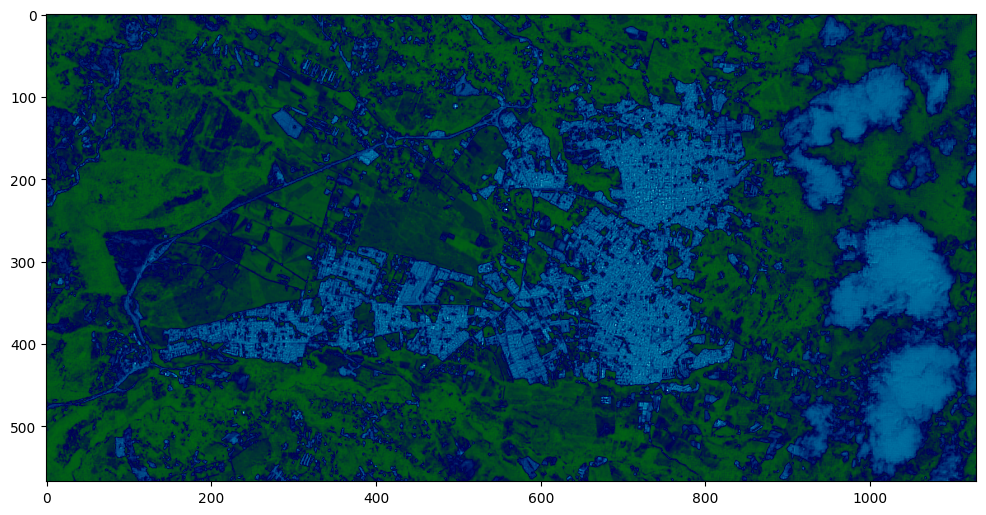

In [62]:
plt.subplots(figsize = (12, 12))
plt.imshow(MNDWI, cmap = 'ocean')

In [63]:
arcilla = banda_swir1_norm / banda_swir2_norm
arcilla

array([[0.9818542 , 1.03239253, 1.02502069, ..., 1.07330244, 1.02294399,
        0.98010064],
       [0.94855009, 1.00103502, 1.13653891, ..., 1.11359256, 1.01776598,
        0.99454657],
       [0.93488616, 0.93394674, 1.01771894, ..., 1.03500272, 0.9661921 ,
        0.93050278],
       ...,
       [1.07204334, 0.96857535, 1.02384507, ..., 1.13887411, 1.15024154,
        1.08754533],
       [1.03709445, 1.04075134, 1.11281356, ..., 0.9773852 , 0.96334231,
        0.93502032],
       [1.01393707, 0.93286056, 0.96853961, ..., 1.04260592, 1.00577   ,
        0.96661873]])